In [35]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression

In [36]:
# Reading data

data = pd.read_csv("Invistico_Airline.csv")
df = data.copy()

# Print data head

df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# **Explanatory Data Analysis**

In [37]:
# Check array dimensions

df.shape

(129880, 23)

In [38]:
# Checking data type, unique values, and null_sum for each column in dataset

def check(df):
  l = []
  columns = df.columns

  for everyColumns in columns:
    dataTypes = df[everyColumns].dtypes
    uniqueValues = df[everyColumns].nunique()
    sum_null = df[everyColumns].isnull().sum()
    l.append([everyColumns, dataTypes, uniqueValues, sum_null])

  # Summary dataframe
  df_check = pd.DataFrame(l)
  df_check.columns = ["Column", "Data Type", "Unique Values", "Sum_Null"]
  return df_check

check(df)

,Column,Data Type,Unique Values,Sum_Null
0,satisfaction,object,2,0
1,Gender,object,2,0
2,Customer Type,object,2,0
3,Age,int64,75,0
4,Type of Travel,object,2,0
5,Class,object,3,0
6,Flight Distance,int64,5398,0
7,Seat comfort,int64,6,0
8,Departure/Arrival time convenient,int64,6,0
9,Food and drink,int64,6,0


In [39]:
categorical_features = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort',
                       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                       'Inflight wifi service', 'Inflight entertainment', 'Online support',
                       'Ease of Online booking', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

for i in categorical_features:
    print(df[i].value_counts())
    print('-' * 50)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64
--------------------------------------------------
Gender
Female    65899
Male      63981
Name: count, dtype: int64
--------------------------------------------------
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
--------------------------------------------------
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
--------------------------------------------------
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
--------------------------------------------------
Seat comfort
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: count, dtype: int64
--------------------------------------------------
Departure/Arrival time convenient
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: count, dtype: int64
------------------------------------------

In our dataset, comprising 129,880 entries and 23 attributes, we found no instances of duplicated records. However, there are 393 missing values, specifically within the 'Arrival Delay in Minutes' column. The data distribution appears to be evenly spread across the various features.

Upon closer inspection, we noticed a significant issue with certain 'rating' features, where a substantial number of records have a rating of '0'. This presents a challenge for meaningful analysis.

To tackle this issue, we opted to merge ratings of '0' with ratings of '1'. This step is crucial since the majority of our features have a minimal number of '0' ratings compared to other ratings. Moreover, maintaining a rating scale from 1 to 5 is deemed suitable for our analytical purposes.

**Correlation among features**

<Axes: >

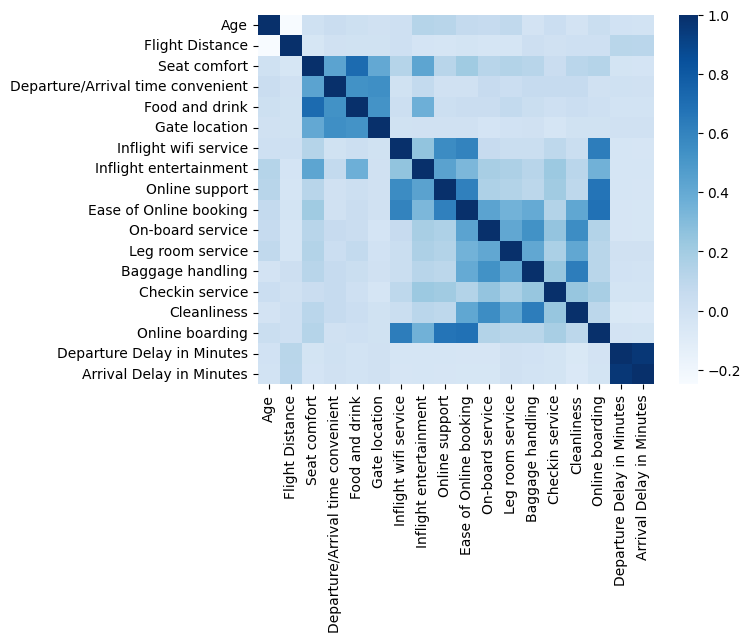

In [40]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, cmap="Blues")


It's clear that there exists an extremely high correlation of 0.97 between "Departure Delay in Minutes" and 'Arrival Delay in Minutes'. This strong correlation indicates that these two variables essentially convey the same information. Thus, it's prudent to remove one of them. Considering that 'Arrival Delay in Minutes' also has missing values, we've opted to eliminate this variable. This simplification will streamline our analysis while preserving the crucial information.

In [41]:
# Drop the 'Arrival Delay in Minutes' column from the dataframe
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

# **Data Visualization**

In [42]:
# List of rating features to be considered for analysis
rating_features = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                   'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                   'Online boarding']

C:\Users\vince\AppData\Local\Temp\ipykernel_17384\602515478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='satisfaction', data=df, ax=axes[row, col], palette=['salmon', 'skyblue'])
C:\Users\vince\AppData\Local\Temp\ipykernel_17384\602515478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='satisfaction', data=df, ax=axes[row, col], palette=['salmon', 'skyblue'])
C:\Users\vince\AppData\Local\Temp\ipykernel_17384\602515478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='satisfaction', data=d

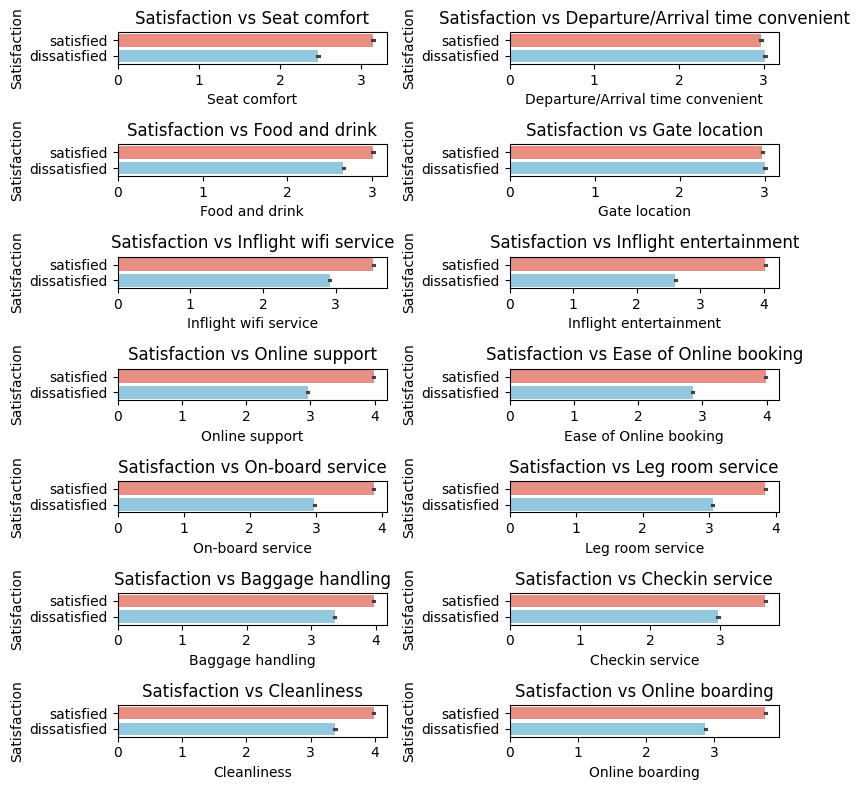

In [43]:
# Set up subplots with 7 rows and 2 columns
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 8))

# Iterate through the rating features and create bar plots
for i, feature in enumerate(rating_features):
    row, col = divmod(i, 2)
    sns.barplot(x=feature, y='satisfaction', data=df, ax=axes[row, col], palette=['salmon', 'skyblue'])

    # Setting titles, x-axis labels, and y-axis labels for each subplot
    axes[row, col].set_title(f'Satisfaction vs {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Satisfaction')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

In these visualizations, our aim is to determine if ratings significantly impact customer satisfaction or, put differently, to pinpoint the most impactful factors affecting customer satisfaction. Our examination reveals that "Departure/Arrival time convenient" and "Gate location" seem to have minimal effect on customer satisfaction. The ratio of satisfied to dissatisfied customers is nearly equivalent for these two features.

Interestingly, we notice that "Inflight entertainment" emerges as a crucial determinant of customer satisfaction, showing a substantial discrepancy between satisfaction levels among satisfied and dissatisfied customers. Hence, it can be considered the most influential factor. Furthermore, "Seat comfort," "Online support," "Ease of Online booking," "On-board service," "Leg room service," and "Online boarding" closely trail "Inflight entertainment" in terms of significance.

However, other features, although still contributing to customer satisfaction, demonstrate relatively weaker impacts.

This analysis aids in prioritizing which aspects of the airline's service may require particular attention to enhance overall customer satisfaction.

In these analyses, we delve into understanding customer satisfaction concerning their provided ratings. Particularly notable is the observation regarding 'Inflight entertainment,' where the majority of customers giving ratings of 4 and 5 express high satisfaction. Remarkably, those rating it a 5 are almost exclusively satisfied, indicating a lack of dissatisfied customers in this category. Conversely, ratings of 1, 2, or 3 generally correspond to dissatisfaction, underscoring how customer ratings for 'Inflight entertainment' distinctly mirror their satisfaction levels.

Similarly, examining 'Seat comfort,' 'Online support,' 'Ease of Online booking,' 'On-board service,' 'Leg room service,' and 'Online boarding' reveals that most customers providing ratings of 4 or 5 express satisfaction, unlike those giving lower ratings. This suggests these factors significantly influence customer satisfaction.

Conversely, 'Departure/Arrival time convenient' and 'Gate location' don't exhibit a clear pattern in their ratings. For instance, customers giving ratings of "4" show a 50% satisfaction rate and 50% dissatisfaction rate. This indicates a limited impact of these features on customer satisfaction.

In summary, the distribution of customer ratings across various features demonstrates varying degrees of influence on customer satisfaction. 'Inflight entertainment' takes precedence, followed by 'Seat comfort' and 'Online support,' while the remaining features show less pronounced effects.

Recommendations:

Enhance Inflight Entertainment: Given its substantial impact on customer satisfaction, investing in and improving inflight entertainment options could yield significant benefits.

Prioritize Seat Comfort: Focus on enhancing seat comfort to further elevate customer satisfaction levels.

Strengthen Online Support: Continue to provide robust online support services, as they contribute positively to customer satisfaction.

Monitor and Improve Other Features: While other features show less pronounced effects, they should not be ignored. Continue to monitor and make incremental improvements to all aspects of the airline service to maintain overall customer satisfaction.

These recommendations stem from our analysis of the correlation between customer ratings and satisfaction levels for each feature and should guide efforts to enhance customer experience and satisfaction.

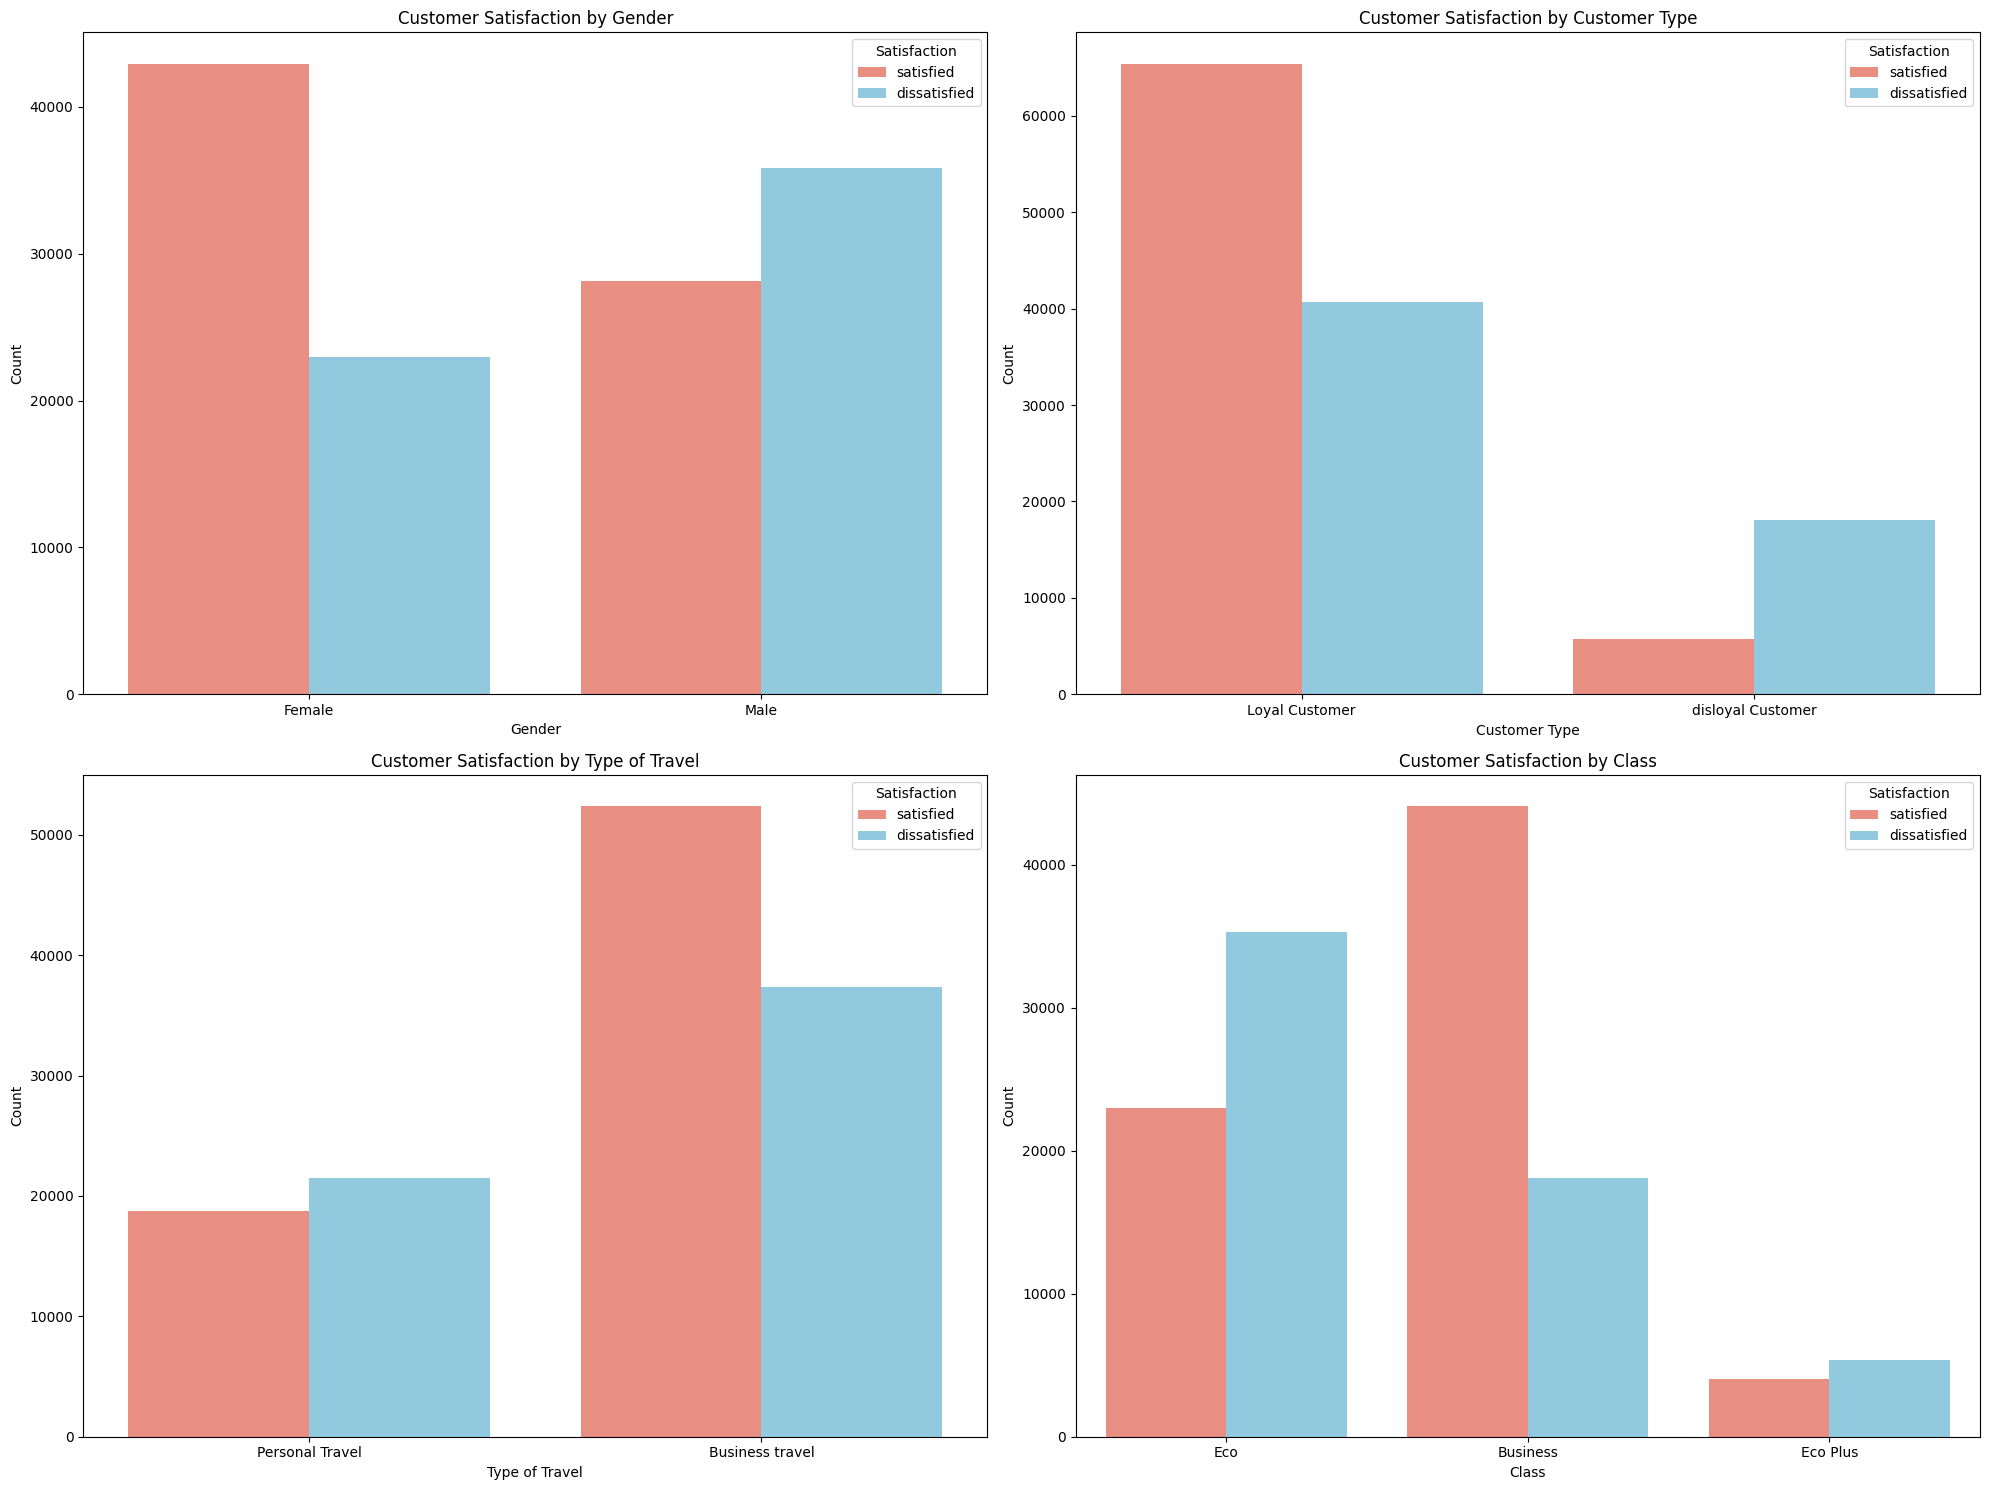

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through each categorical column
for i, col in enumerate(['Gender', 'Customer Type', 'Type of Travel', 'Class']):
    sns.countplot(data=df, x=col, hue='satisfaction', palette=['salmon', 'skyblue'], ax=axs[i])

    # Setting the title, labels, and legend for a plot depicting customer satisfaction by a specific feature
    axs[i].set_title('Customer Satisfaction by {}'.format(col))
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    axs[i].legend(title='Satisfaction', loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

These visuals highlight several significant trends: firstly, women tend to exhibit higher levels of satisfaction compared to men. Secondly, customers in the 'Business' travel category generally report higher satisfaction levels than those in 'Eco' and 'Eco Plus.' This discrepancy likely arises from the enhanced and more comfortable services typically associated with 'Business' class.

Additionally, the data indicates that 'Business' travelers are consistently more satisfied than 'Personal' travelers, who exhibit a nearly equal ratio of satisfied to dissatisfied customers. Lastly, 'loyal' customers tend to express higher satisfaction levels, while 'disloyal' customers are predominantly dissatisfied.



# **Data Pre-processing**

In [45]:
# Split data into x and y.
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [46]:
# # Label Encoding.
# label_encoder = LabelEncoder()
# for i in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
#     X[i] = label_encoder.fit_transform(X[i])

In [47]:
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])
X['Gender'].unique()

array([0, 1])

In [48]:
le_ct = LabelEncoder()
X['Customer Type'] = le_ct.fit_transform(X['Customer Type'])
X['Customer Type'].unique()

array([0, 1])

In [49]:
le_tot = LabelEncoder()
X['Type of Travel'] = le_tot.fit_transform(X['Type of Travel'])
X['Type of Travel'].unique()

array([1, 0])

In [50]:
le_class = LabelEncoder()
X['Class'] = le_class.fit_transform(X['Class'])
X['Class'].unique()

array([1, 0, 2])

In [51]:
# # Select the features you want to scale
# selected_features = X[["Age", "Flight Distance", "Departure Delay in Minutes"]]

# # Create a scaler object.
# scaler = StandardScaler()

# # Fit scaler on the selected features.
# scaler.fit(selected_features)

# # Transform the selected features with the scaler.
# selected_features_scaled = scaler.transform(selected_features)

# # Replace the original columns with the scaled values in the DataFrame
# X[["Age", "Flight Distance", "Departure Delay in Minutes"]] = selected_features_scaled

# X.head()

In [52]:
scaler_age = StandardScaler()

# Fit and transform the 'Age' column
X['Age'] = scaler_age.fit_transform(X[['Age']])


In [53]:
scaler_fd = StandardScaler()

# Fit and transform the 'Age' column
X['Flight Distance'] = scaler_fd.fit_transform(X[['Flight Distance']])

In [54]:
scaler_dd = StandardScaler()

# Fit and transform the 'Age' column
X['Departure Delay in Minutes'] = scaler_dd.fit_transform(X[['Departure Delay in Minutes']])

# **Modelling**

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90916, 21), (38964, 21), (90916,), (38964,))

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)


**Evaluation**

Text(50.722222222222214, 0.5, 'Predicted values')

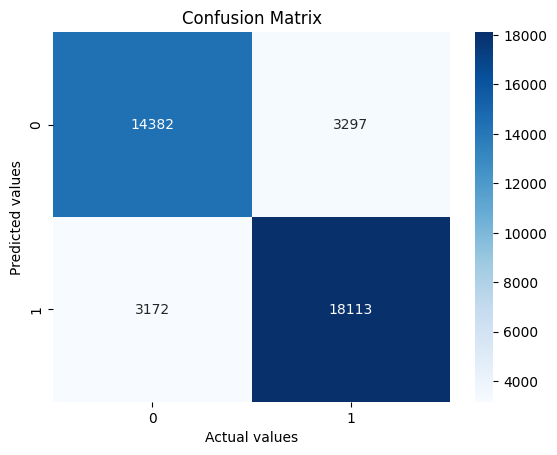

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix.T, annot= True, fmt= 'd', cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [59]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

dissatisfied       0.81      0.82      0.82     17554
   satisfied       0.85      0.85      0.85     21410

    accuracy                           0.83     38964
   macro avg       0.83      0.83      0.83     38964
weighted avg       0.83      0.83      0.83     38964



In [60]:
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,0,0,1.691351,1,1,-1.671103,0,0,0,2,...,4,2,3,3,0,3,5,3,2,-0.386481
1,1,0,0.500820,1,0,0.469852,0,0,0,3,...,2,2,3,4,4,4,2,3,2,7.756204
2,0,0,-1.615680,1,1,0.152458,0,0,0,3,...,0,2,2,3,3,4,4,4,2,-0.386481
3,0,0,1.360648,1,1,-1.322552,0,0,0,3,...,4,3,1,1,0,1,4,1,3,-0.386481
4,0,0,2.022054,1,1,-1.584452,0,0,0,3,...,3,4,2,2,0,2,4,2,5,-0.386481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,1,-0.689712,1,1,-0.243799,5,5,5,3,...,5,2,2,3,3,4,4,4,2,-0.386481
129876,1,1,1.559070,1,0,0.102804,2,3,2,4,...,1,1,3,2,3,3,1,2,1,4.183929
129877,1,1,1.955913,1,1,0.329653,3,0,3,3,...,2,2,4,4,3,4,2,3,2,3.684862
129878,1,1,1.757491,1,1,0.456222,3,2,3,2,...,2,2,3,3,2,3,2,1,2,4.682997


In [61]:
X = np.array([["Female", "Loyal Customer", 31, "Personal Travel", "Eco", 1791, 2, 1, 2, 1, 5, 1, 4, 1, 3, 4, 3, 1, 1, 1, 300]])
X

array([['Female', 'Loyal Customer', '31', 'Personal Travel', 'Eco',
        '1791', '2', '1', '2', '1', '5', '1', '4', '1', '3', '4', '3',
        '1', '1', '1', '300']], dtype='<U15')

In [62]:
X[:, 0] = le_gender.transform(X[:, 0])
X[:, 1] = le_ct.transform(X[:, 1])
X[:, 3] = le_tot.transform(X[:, 3])
X[:, 4] = le_class.transform(X[:, 4])
X[:, 2] = scaler_age.fit_transform(X[:, [2]].astype(float)).flatten()
X[:, 5] = scaler_fd.fit_transform(X[:, [5]].astype(float)).flatten()
X[:, 20] = scaler_dd.fit_transform(X[:, [20]].astype(float)).flatten()
X = X.astype(float)
X

array([[0., 0., 0., 1., 1., 0., 2., 1., 2., 1., 5., 1., 4., 1., 3., 4.,
        3., 1., 1., 1., 0.]])

In [63]:
y_pred = model.predict(X)
y_pred

c:\Users\vince\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['dissatisfied'], dtype=object)

In [64]:
import pickle

In [65]:
data = {"model" : model, "le_gender" : le_gender, "le_ct": le_ct, "le_tot" : le_tot, "le_class" : le_class, "scaler_age" : scaler_age, "scaler_fd" : scaler_fd, "scaler_dd" : scaler_dd}
with open("saved_steps.pkl", "wb") as file:
    pickle.dump(data, file)

In [66]:
with open("saved_steps.pkl", "rb") as file:
    data = pickle.load(file)

model_loaded = data["model"]
le_gender = data["le_gender"]
le_ct = data["le_ct"]
le_tot = data["le_tot"]
le_class = data["le_class"]
scaler_age = data["scaler_age"]
scaler_fd = data["scaler_fd"]
scaler_dd = data["scaler_dd"]

In [67]:
y_pred = model_loaded.predict(X)
y_pred

c:\Users\vince\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['dissatisfied'], dtype=object)